In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Define the regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

In [3]:
# Set seed for reproducibility
np.random.seed(1234)

# Generate data
X = np.random.uniform(5, 15, 100)
Y = reg(X) + np.random.normal(0, 5, 100)

In [4]:
# Create DataFrame
Sim_1 = pd.DataFrame({'X': X, 'Y': Y})

In [5]:
Sim_1.head()

,X,Y
0,6.915195,21.763548
1,11.221088,1.201202
2,9.377277,24.539737
3,12.853586,29.530616
4,12.799758,23.325363


In [6]:
# Split into training and testing sets
Train_set = Sim_1.iloc[:80]
Test_set = Sim_1.iloc[80:]

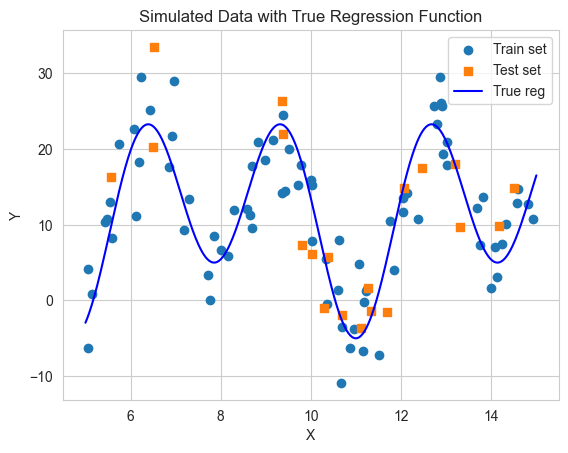

In [7]:
# Plot the training and testing points
plt.scatter(Train_set['X'], Train_set['Y'], marker='o', label='Train set')
plt.scatter(Test_set['X'], Test_set['Y'], marker='s', label='Test set')

# Plot the true regression curve
x_curve = np.linspace(5, 15, 500); y_curve = reg(x_curve)
plt.plot(x_curve, y_curve, c='blue', label='True reg')

plt.xlabel('X'); plt.ylabel('Y')
plt.legend()
plt.title('Simulated Data with True Regression Function')
# plt.grid(True)
plt.show()

In [8]:
# Set bin count
k = 5

In [9]:
class StepFunction:
    def __init__(self, x, y):
        """
        Initialize with breakpoints `x` and values `y`.
        `x` should have length k+1 and `y` should have length k.
        """
        if len(y) != (len(x) - 1):
            raise ValueError("Length of y must be one less than length of x")
        self.x = x
        self.y = y

    def predict(self, z):
        # Predict step function values at input z (scalar or array).

        z = np.asarray(z) # convert the input datatype to np array
        result = np.zeros_like(z, dtype=float) # makes an np array of zeros of same length as of the input vector.

        for i in range(len(self.y)): # iterating over all the bins
            # check: Does the value of z belongs to the i-th bin? If yes, then insert the yes, then y value of that bin in inserted in result
            result[(z >= self.x[i]) & (z < self.x[i + 1])] = self.y[i]
        return result

In [10]:
# For understanding
u = np.array([100,200,400])
u[[0,2]]

array([100, 400])

In [11]:
# For understanding
u[[False, True, False]]

array([200])

In [12]:
# For understanding
u[[False, False, False]]

array([], dtype=int64)

In [13]:
def Bin_smoothing(k, Train_set, Test_set, reg_func):
    x_train = Train_set['X'].values; y_train = Train_set['Y'].values
    # Bin edges
    BI = np.linspace(5, 15, k + 1)
    Means = []

    for j in range(k):
        # store the data/observations indices for which the x-value lies in the j-th bin
        indices = np.where((x_train > BI[j]) & (x_train <= BI[j+1]))[0]
        # compute the mean of the corresponding y-values
        m = np.mean(y_train[indices]) if len(indices) > 0 else 0

        Means.append(m)

    sf = StepFunction(BI, Means)

    ## Plotting
    # Scatter plots
    plt.plot(Train_set['X'], Train_set['Y'], 'o', label='Train')
    plt.plot(Test_set['X'], Test_set['Y'], 's', label='Test')

    # Plot the true regression function (assuming reg_func is a Python function)
    x_curve = np.linspace(Train_set['X'].min(), Train_set['X'].max(), 500)
    plt.plot(x_curve, reg_func(x_curve), color='blue', label='True function')

    # Plot the step function
    plt.plot(x_curve, sf.predict(x_curve), color='red', label='Step function')
    for b in BI:
        plt.axvline(x=b, color='gray', linestyle='dotted')

    plt.legend()
    plt.title(f'k = {k}')
    plt.show()

    # Compute test and train errors
    err_Test = np.mean((Test_set['Y'].values - sf.predict(Test_set['X'].values))**2)
    err_Train = np.mean((Train_set['Y'].values - sf.predict(Train_set['X'].values))**2)

    print('Train error =',err_Train, '\nTest error =', err_Test)

In [14]:
# For understanding
x_train = Train_set['X'].values; y_train = Train_set['Y'].values
BI = np.linspace(5, 15, k + 1)
j=1

np.where((x_train > BI[j]) & (x_train <= BI[j+1]))[0]

array([ 5,  6, 10, 14, 20, 23, 26, 28, 36, 48, 60, 64, 74, 79])

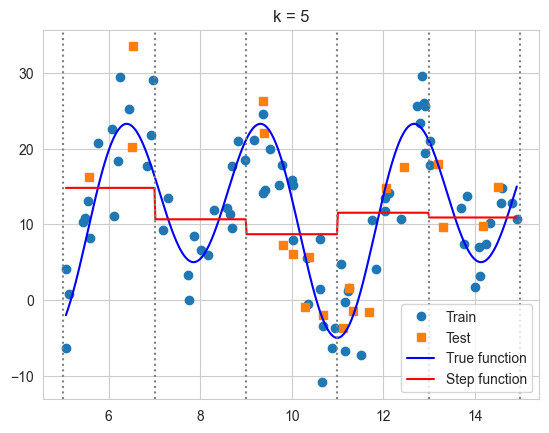

Train error = 81.32519884680246 
Test error = 93.98518039175073


In [15]:
Bin_smoothing(k=5, Train_set=Train_set, Test_set=Test_set, reg_func=reg)

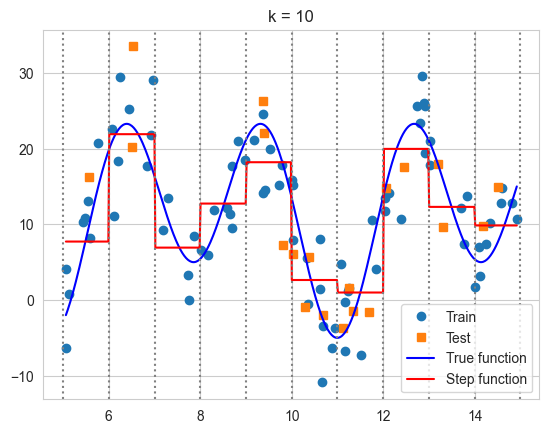

Train error = 36.70100949901854 
Test error = 29.906918012052785


In [16]:
Bin_smoothing(k=10, Train_set=Train_set, Test_set=Test_set, reg_func=reg)

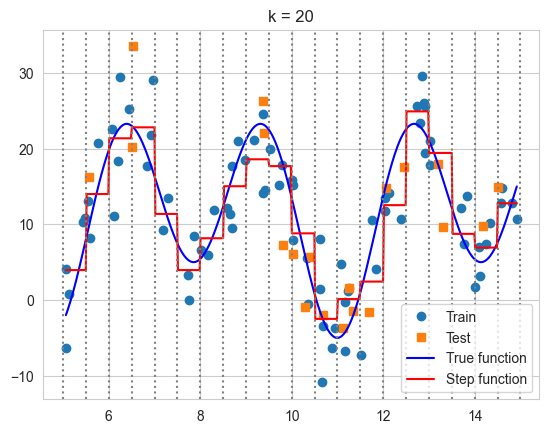

Train error = 20.422338171669306 
Test error = 29.509100451489324


In [17]:
Bin_smoothing(k=20, Train_set=Train_set, Test_set=Test_set, reg_func=reg)

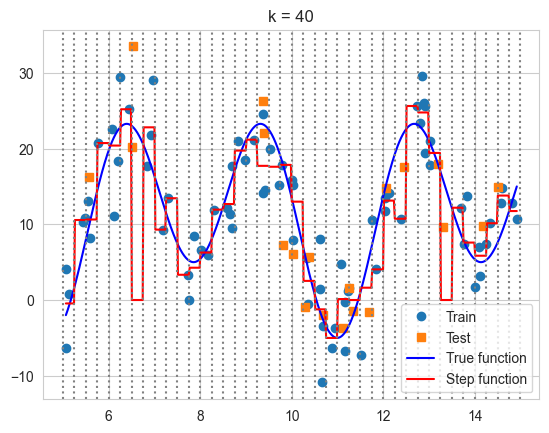

Train error = 13.779313395736864 
Test error = 82.19540277815479


In [18]:
Bin_smoothing(k=40, Train_set=Train_set, Test_set=Test_set, reg_func=reg)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error

In [53]:
# Load Boston dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
display(boston.frame.head())
df = boston.frame[['LSTAT' ,  'MEDV']].copy()
df.columns = ['X', 'Y']

# Sort data by predictor (X = lstat)
df = df.sort_values(by='X').reset_index(drop=True)
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


,X,Y
0,1.73,50.0
1,1.92,50.0
2,1.98,34.9
3,2.47,41.7
4,2.87,36.4


In [69]:

model = np.poly1d(np.polyfit(df['X'], df['Y'] ,2))

In [58]:
# Step Function class
class StepFunction:
    def __init__(self, bin_edges, means):
        """
        Initialize with bin edges `bin_edges` and corresponding means `means`.
        """
        if len(means) != (len(bin_edges) - 1):
            raise ValueError("Length of y must be one less than length of x")

        self.bin_edges = bin_edges
        self.means = means

    def predict(self, x):
        preds = np.zeros_like(x, dtype=float)

        for i in range(len(self.bin_edges) - 1):
            preds[(x > self.bin_edges[i]) & (x <= self.bin_edges[i + 1])] = self.means[i]

        preds[x <= self.bin_edges[0]] = self.means[0]
        preds[x > self.bin_edges[-1]] = self.means[-1]

        return preds

In [73]:
# Existing bin smoother function
def Bin_smoothing(k, Train_set, Test_set, reg_func=lambda x: np.zeros_like(x), plot=False):
    x_train = Train_set['X'].values
    y_train = Train_set['Y'].values
    BI = np.linspace(x_train.min(), x_train.max(), k + 1)
    Means = []

    for j in range(k):
        indices = np.where((x_train > BI[j]) & (x_train <= BI[j+1]))[0]
        m = np.mean(y_train[indices]) if len(indices) > 0 else 0
        Means.append(m)

    sf = StepFunction(BI, Means)

    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(Train_set['X'], Train_set['Y'],'o', label='Train', alpha=0.5)
        plt.plot(Test_set['X'], Test_set['Y'],'s', label='Test', alpha=0.5)

        # x_curve = np.linspace(Train_set['X'].min(), Train_set['X'].max(), 500)
        # ind = np.where(x_curve == Train_set['X'])[0]
        # y_curve = Train_set['Y']
        plt.plot(Train_set['X'], model(Train_set['X']), color='black', label='True function')
        plt.plot(Train_set['X'], sf.predict(Train_set['X']), color='red', label='Step function')

        for b in BI:
            plt.axvline(x=b, color='gray', linestyle='dotted')
        plt.legend()
        plt.title(f'Bin Smoother with k = {k}')
        plt.show()

    err_Test = np.mean((Test_set['Y'].values - sf.predict(Test_set['X'].values))**2)
    return err_Test

In [74]:
# 23-fold Cross-validation
k_folds = 23
fold_size = len(df) // k_folds
k_values = range(2, 31)  # Try different bin counts
val_errors = {k: [] for k in k_values}

for i in range(k_folds):
    start = i * fold_size
    end = (i + 1) * fold_size if i != k_folds - 1 else len(df)

    Test_set = df.iloc[start:end]
    Train_set = pd.concat([df.iloc[:start], df.iloc[end:]])

    for k in k_values:
        error = Bin_smoothing(k, Train_set, Test_set, plot=False)
        val_errors[k].append(error)

# Average validation error
avg_errors = {k: np.mean(val_errors[k]) for k in k_values}

# Find best k
best_k = min(avg_errors, key=avg_errors.get)
print(f" Best k: {best_k} with Avg Test MSE: {avg_errors[best_k]:.4f}")

 Best k: 12 with Avg Test MSE: 34.1628


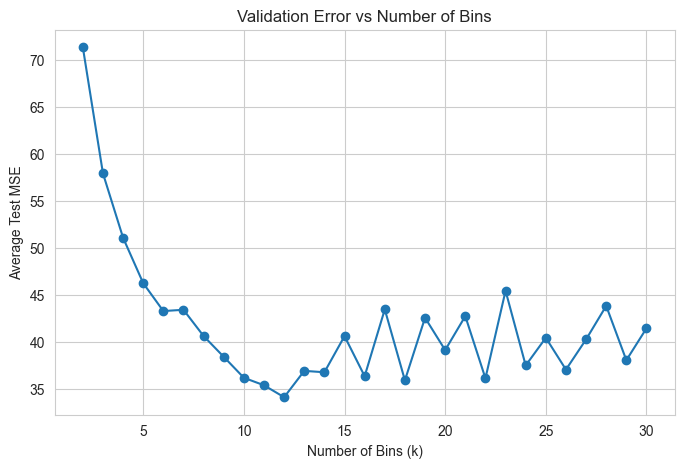

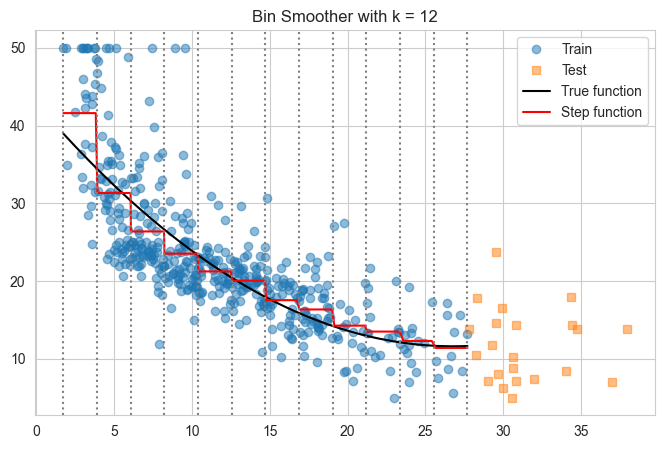

np.float64(21.48)

In [75]:
# Plot validation error vs k
plt.figure(figsize=(8, 5))
plt.plot(list(avg_errors.keys()), list(avg_errors.values()), marker='o')
plt.xlabel('Number of Bins (k)')
plt.ylabel('Average Test MSE')
plt.title('Validation Error vs Number of Bins')
plt.grid(True)
plt.show()

# Optional: Visualize best model on full dataset
Bin_smoothing(best_k, df.iloc[:-fold_size], df.iloc[-fold_size:], plot=True)